In [699]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics 

In [700]:
df1 = pd.read_excel("/Users/abhisaurav/Desktop/assessment.xlsx",header =[0], sheet_name = 'Dataset 1 - General',skiprows=[1])
df1.columns = df1.columns.str.split('.').str[0]
#df1.columns = df1.columns.map(''.join)
df2 = pd.read_excel("/Users/abhisaurav/Desktop/assessment.xlsx",header =[0], sheet_name = 'Dataset 2 - Underwriting',skiprows=[1])
df2.columns = df2.columns.str.split('.').str[0]
#df2.columns = df2.columns.map(''.join)
dfx = pd.merge(df1, df2, on=['Firm','Firm'])
dfx = dfx.apply(pd.to_numeric,errors='ignore')
dfx=dfx.round(2)
dfx

,Firm,NWP (£m),NWP (£m),NWP (£m),NWP (£m),NWP (£m),SCR (£m),SCR (£m),SCR (£m),SCR (£m),...,Gross expense ratio,Gross expense ratio,Gross expense ratio,Gross expense ratio,Gross expense ratio,Gross combined ratio,Gross combined ratio,Gross combined ratio,Gross combined ratio,Gross combined ratio
0,Firm 1,-13779.82,0.00,0.00,0.00,0.00,1085.36,0.00,0.00,0.00,...,0.00,56.81,0.00,0.00,0.00,0.00,68.22,0.00,0.00,0.00
1,Firm 2,28.18,26.87,25.06,23.23,21.72,10.19,10.11,9.50,8.15,...,0.74,0.96,0.81,0.00,0.00,0.95,1.13,0.94,0.00,0.00
2,Firm 3,0.00,75.61,70.58,78.43,85.74,322.96,363.78,362.29,394.30,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,Firm 4,22344.20,23963.91,25760.39,25512.75,24996.02,16573.64,16332.75,17103.62,17219.25,...,0.14,0.15,0.09,0.05,-0.55,0.85,1.47,1.73,1.21,-10.74
4,Firm 5,68.20,51.66,44.01,42.01,81.27,52.82,38.05,34.70,57.23,...,0.18,0.13,0.11,0.12,0.11,0.51,1.26,1.30,0.98,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,Firm 321,0.00,0.00,-1.01,-6.60,24.63,0.00,0.26,62.23,51.83,...,0.21,0.26,0.25,0.24,0.28,0.98,1.00,0.97,0.96,0.82
321,Firm 322,2092.16,2084.12,2022.21,2103.05,2029.70,1711.22,1641.31,1329.47,1399.10,...,0.36,0.37,0.40,0.42,0.37,0.89,0.96,0.91,0.94,1.00
322,Firm 323,0.00,0.00,0.00,0.00,0.00,30.44,15.23,5.33,1.55,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
323,Firm 324,23.42,22.65,24.27,25.81,26.55,32.10,30.21,29.52,29.95,...,0.43,0.37,0.36,0.33,0.30,1.06,1.01,0.98,0.99,0.78


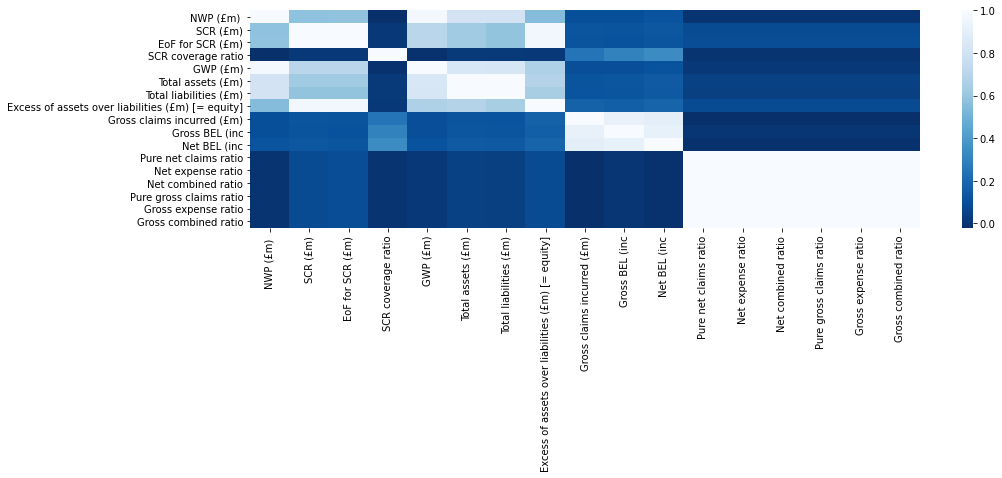

In [701]:
df_measures = dfx.iloc[:,1:].mean(axis=1, level=0)
df_corr=pd.concat([dfx.iloc[:,0], df_measures], axis=1)
df_corr

# Feature correlation
plt.figure(figsize=(15,4))
f_cor = df_corr.corr()
sns.heatmap(f_cor, cmap="Blues_r")

In [702]:
#checking deviation

df_nwp = dfx.iloc[:,0:6]
df_nwp['upper'] = df_nwp["NWP (£m) "].mean(axis=1)+2*df_nwp["NWP (£m) "].std(axis=1)
df_nwp['lower'] = df_nwp["NWP (£m) "].mean(axis=1)-2*df_nwp["NWP (£m) "].std(axis=1)

df_nwp['dev'] = np.where((df_nwp.iloc[:,1] >= df_nwp['upper']) | (df_nwp.iloc[:,1] <= df_nwp['lower']) |
                         (df_nwp.iloc[:,2] >= df_nwp['upper']) | (df_nwp.iloc[:,2] <= df_nwp['lower']) |
                         (df_nwp.iloc[:,3] >= df_nwp['upper']) | (df_nwp.iloc[:,3] <= df_nwp['lower']) |
                         (df_nwp.iloc[:,4] >= df_nwp['upper']) | (df_nwp.iloc[:,4] <= df_nwp['lower']) |
                         (df_nwp.iloc[:,5] >= df_nwp['upper']) | (df_nwp.iloc[:,5] <= df_nwp['lower']),'Yes','No')

df_nwp = df_nwp[df_nwp['dev']=='No']
df_firm = df_nwp['Firm']

dfnew = pd.merge(df_firm, dfx, on=['Firm','Firm'])
dfnew

,Firm,NWP (£m),NWP (£m),NWP (£m),NWP (£m),NWP (£m),SCR (£m),SCR (£m),SCR (£m),SCR (£m),...,Gross expense ratio,Gross expense ratio,Gross expense ratio,Gross expense ratio,Gross expense ratio,Gross combined ratio,Gross combined ratio,Gross combined ratio,Gross combined ratio,Gross combined ratio
0,Firm 1,-13779.82,0.00,0.00,0.00,0.00,1085.36,0.00,0.00,0.00,...,0.00,56.81,0.00,0.00,0.00,0.00,68.22,0.00,0.00,0.00
1,Firm 2,28.18,26.87,25.06,23.23,21.72,10.19,10.11,9.50,8.15,...,0.74,0.96,0.81,0.00,0.00,0.95,1.13,0.94,0.00,0.00
2,Firm 3,0.00,75.61,70.58,78.43,85.74,322.96,363.78,362.29,394.30,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,Firm 4,22344.20,23963.91,25760.39,25512.75,24996.02,16573.64,16332.75,17103.62,17219.25,...,0.14,0.15,0.09,0.05,-0.55,0.85,1.47,1.73,1.21,-10.74
4,Firm 5,68.20,51.66,44.01,42.01,81.27,52.82,38.05,34.70,57.23,...,0.18,0.13,0.11,0.12,0.11,0.51,1.26,1.30,0.98,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,Firm 318,422.65,327.04,371.15,441.16,0.00,448.27,412.40,442.84,393.41,...,0.33,0.46,0.63,0.93,0.76,0.21,-0.08,1.51,1.48,0.99
248,Firm 321,0.00,0.00,-1.01,-6.60,24.63,0.00,0.26,62.23,51.83,...,0.21,0.26,0.25,0.24,0.28,0.98,1.00,0.97,0.96,0.82
249,Firm 322,2092.16,2084.12,2022.21,2103.05,2029.70,1711.22,1641.31,1329.47,1399.10,...,0.36,0.37,0.40,0.42,0.37,0.89,0.96,0.91,0.94,1.00
250,Firm 324,23.42,22.65,24.27,25.81,26.55,32.10,30.21,29.52,29.95,...,0.43,0.37,0.36,0.33,0.30,1.06,1.01,0.98,0.99,0.78


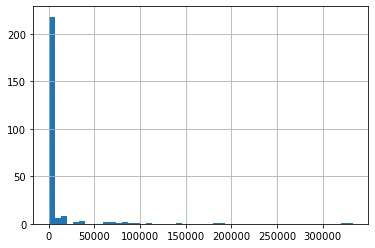

In [703]:
dfnew.iloc[:,30].hist(bins = 50)

In [704]:
#filtering total assets greater than 0

df_filtered = dfnew[dfnew.iloc[:,30] > 0]
df_measures = df_filtered.iloc[:,1:].mean(axis=1, level=0)
df=pd.concat([df_filtered.iloc[:,0], df_measures], axis=1)
df

,Firm,NWP (£m),SCR (£m),EoF for SCR (£m),SCR coverage ratio,GWP (£m),Total assets (£m),Total liabilities (£m),Excess of assets over liabilities (£m) [= equity],Gross claims incurred (£m),Gross BEL (inc,Net BEL (inc,Pure net claims ratio,Net expense ratio,Net combined ratio,Pure gross claims ratio,Gross expense ratio,Gross combined ratio
1,Firm 2,25.012,9.054,42.380,4.576,25.012,50.816,8.436,42.380,20.838,112.132,106.858,0.094,0.516,0.612,0.096,0.502,0.604
2,Firm 3,62.072,368.806,569.410,1.498,70.718,1602.334,1032.922,569.410,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,Firm 4,24515.454,17365.904,25654.954,1.422,33857.154,80098.082,61056.444,19041.638,50.910,45.572,49.276,0.696,0.120,0.818,-1.076,-0.024,-1.096
4,Firm 5,57.430,49.806,143.810,2.984,58.604,281.944,137.190,144.754,290.112,244.334,289.992,1.076,0.168,1.244,0.882,0.130,1.010
5,Firm 6,2525.224,2932.272,4016.856,1.316,3373.098,55137.388,51074.422,4062.966,252.246,638.296,477.934,0.684,0.252,0.938,0.698,0.214,0.908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,Firm 316,-38.652,205.634,337.050,1.540,8.364,1021.078,668.896,352.184,75.554,125.730,17.288,0.648,1.110,1.756,0.632,0.390,1.024
246,Firm 317,2096.438,134.018,173.994,1.248,2096.440,12331.180,12155.240,175.938,212.002,417.282,339.602,0.640,0.388,1.028,0.676,0.334,1.012
248,Firm 321,3.404,56.374,130.396,4.448,13.774,2038.544,1894.656,143.882,4.564,0.418,0.418,0.702,0.248,0.946,0.702,0.248,0.946
249,Firm 322,2066.248,1495.276,2106.054,1.368,2188.366,6209.462,3885.638,2323.824,117.830,481.890,61.772,0.488,0.972,1.460,0.552,0.384,0.940


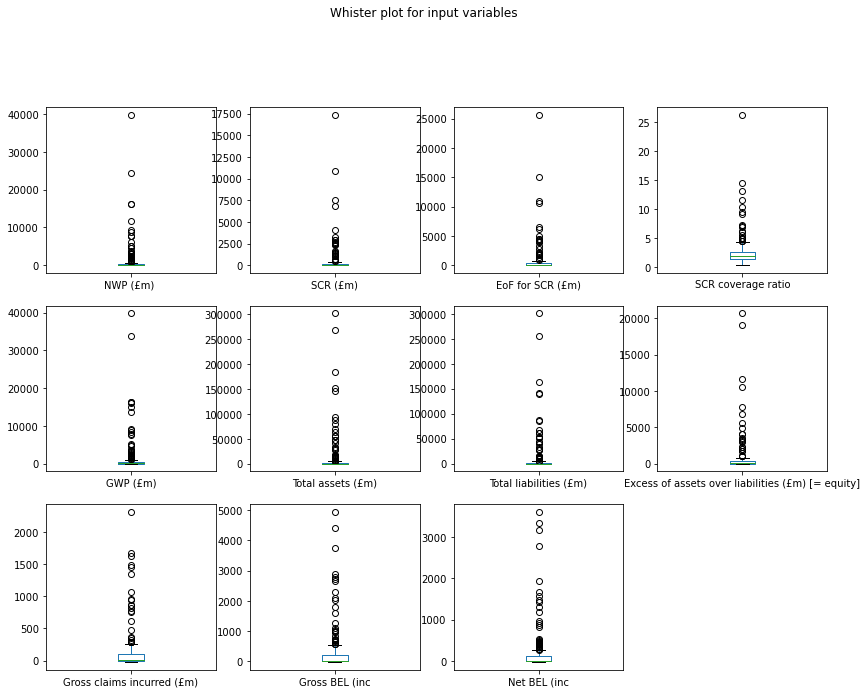

In [705]:
# Checking outliers using Whiskerplots
df1=df.iloc[:,1:12]
c= 'black'
df1.plot(kind='box', 
                                subplots=True, layout=(4,4), 
                                sharex=False, sharey=False, 
                                figsize=(14,14), 
                                title='Whister plot for input variables')
plt.show()

In [706]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

df1 = remove_outlier(df,'NWP (£m) ')
df2 = remove_outlier(df1,'SCR coverage ratio')
df3 = remove_outlier(df2,'Total assets (£m)')
df = remove_outlier(df3,'Net combined ratio')
df.count()

Firm                                                 118
NWP (£m)                                             118
SCR (£m)                                             118
EoF for SCR (£m)                                     118
SCR coverage ratio                                   118
GWP (£m)                                             118
Total assets (£m)                                    118
Total liabilities (£m)                               118
Excess of assets over liabilities (£m) [= equity]    118
Gross claims incurred (£m)                           118
Gross BEL (inc                                       118
Net BEL (inc                                         118
Pure net claims ratio                                118
Net expense ratio                                    118
Net combined ratio                                   118
Pure gross claims ratio                              118
Gross expense ratio                                  118
Gross combined ratio           

In [707]:
#Filter firm meeting with prudential requirement
df= df[df['SCR coverage ratio'] > 1]

#Filter firms with profit
df= df[df['Net combined ratio'] < 1] 

#Filter firm with less risk
df= df[df["NWP (£m) "]/df["GWP (£m)"] < 1]

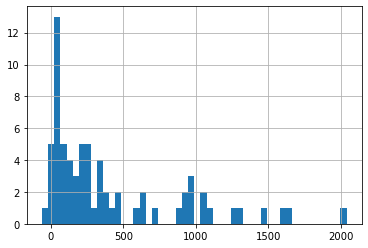

In [708]:
df["Total assets (£m)"].hist(bins = 50)

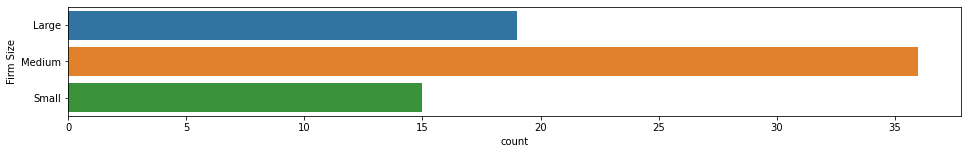

In [731]:
#creating Bucket based on firm size
conditions, type_choices = (
    [
        (df["Total assets (£m)"] < 50),
        (df["Total assets (£m)"] < 500)
    ],
        ["Small","Medium"]
)
    
df["Firm Size"] = np.select(conditions, type_choices, default="Large")

plt.figure(figsize=(16,2))
fig = sns.countplot(y="Firm Size", data=df)
plt.show()


In [732]:
df_firms = df[df['Firm Size']=='Large']
df_firms

,Firm,NWP (£m),SCR (£m),EoF for SCR (£m),SCR coverage ratio,GWP (£m),Total assets (£m),Total liabilities (£m),Excess of assets over liabilities (£m) [= equity],Gross claims incurred (£m),Gross BEL (inc,Net BEL (inc,Pure net claims ratio,Net expense ratio,Net combined ratio,Pure gross claims ratio,Gross expense ratio,Gross combined ratio,Firm Size,cluster
2,Firm 3,62.072,368.806,569.410,1.498,70.718,1602.334,1032.922,569.410,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Large,0
33,Firm 42,44.910,56.774,99.676,1.736,179.580,632.276,560.986,71.292,88.766,-3.264,-3.264,0.268,0.390,0.660,0.268,0.390,0.660,Large,2
60,Firm 74,193.990,261.010,516.280,1.910,296.274,1040.544,519.842,520.702,965.558,2028.066,1581.322,0.554,0.376,0.930,0.592,0.326,0.914,Large,3
64,Firm 78,316.476,190.510,278.346,1.402,446.504,932.786,714.160,218.624,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Large,0
68,Firm 82,376.344,273.606,520.824,1.844,470.738,1303.036,782.210,520.824,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Large,0
107,Firm 139,537.824,230.454,295.684,1.236,708.262,1254.540,958.854,295.684,-0.056,1.096,0.488,0.000,0.000,0.000,0.000,0.000,0.000,Large,0
142,Firm 184,40.596,135.564,358.174,2.652,123.800,1045.098,733.900,311.198,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Large,1
173,Firm 222,288.326,156.164,220.328,1.364,372.932,951.478,743.046,208.434,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Large,0
181,Firm 231,22.566,37.734,72.750,1.854,221.500,585.634,517.412,68.220,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Large,1
186,Firm 237,39.788,123.868,286.442,2.104,200.944,963.458,730.056,233.402,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Large,1


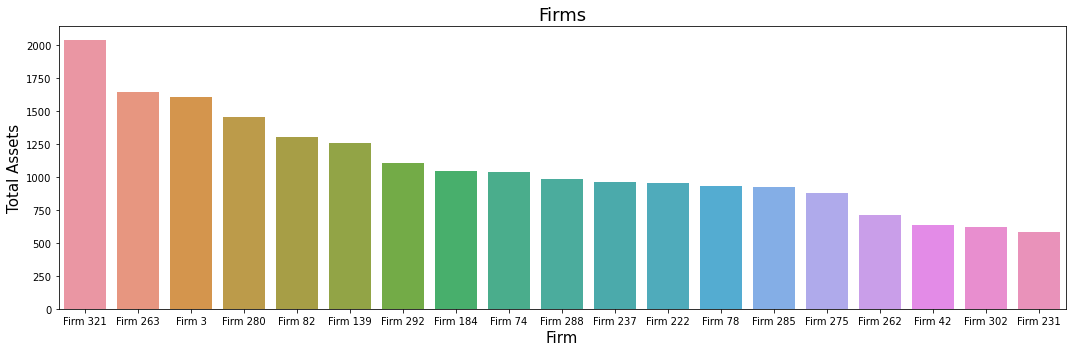

In [733]:
#Firms to allocate resources:

plt.figure(figsize=(15,5))
# make barplotTotal assets (£m)
sns.barplot(x='Firm', y="Total assets (£m)", data=df_firms,order=df_firms.sort_values('Total assets (£m)',ascending = False).Firm)
# set labels
plt.xlabel("Firm", size=15)
plt.ylabel("Total Assets", size=15)
plt.title("Firms", size=18)
plt.tight_layout()
plt.savefig("barplot_Seaborn_Python.png", dpi=100)

In [734]:
#Clustering on firms with medium and large size
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

df_cluster = df.iloc[:,[1,2,4,5,6,9,14,18]]
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 2 to 250
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   NWP (£m)                    70 non-null     float64
 1   SCR (£m)                    70 non-null     float64
 2   SCR coverage ratio          70 non-null     float64
 3   GWP (£m)                    70 non-null     float64
 4   Total assets (£m)           70 non-null     float64
 5   Gross claims incurred (£m)  70 non-null     float64
 6   Net combined ratio          70 non-null     float64
 7   Firm Size                   70 non-null     object 
dtypes: float64(7), object(1)
memory usage: 7.4+ KB


In [735]:
#transformer for categorical features

categorical_features = list(df_cluster.select_dtypes(include=['object']).columns.values.tolist())
categorical_transformer = Pipeline(
    [
        ('onehot', OneHotEncoder(drop='first',handle_unknown = 'ignore')),
    ]
)

#transformer for numerical features

numeric_features = list(df_cluster.select_dtypes(exclude=['object']).columns.values.tolist()) 
numeric_transformer = Pipeline(
    [
        ('scaler', StandardScaler()),
    ]
)

# combine them in a single ColumnTransformer
preprocessor = ColumnTransformer(
    [
        ('categoricals', categorical_transformer, categorical_features),
        ('numericals', numeric_transformer, numeric_features)
    ],remainder='passthrough'
)

In [736]:
transformed = preprocessor.fit_transform(df_cluster)
newdf = pd.DataFrame(transformed)

Text(0, 0.5, 'Inertia')

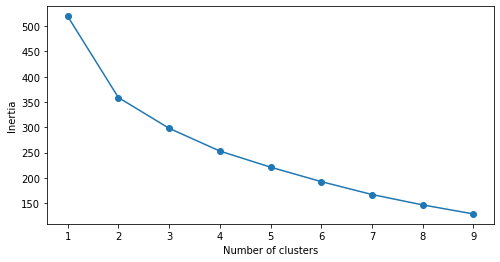

In [737]:
SSE = []

for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(newdf)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them

frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(8,4))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [738]:
kmeanModel = KMeans(n_clusters = 4)
kmeanModel.fit(newdf)
y_kmeans = kmeanModel.predict(newdf)
y_kmeans



array([1, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 3, 0, 1, 3, 1, 1, 0, 2, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 3, 1, 1, 0, 2, 2, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 1, 2, 3, 1, 1, 1, 0, 3, 2, 0, 0, 0,
       0, 0, 2, 2], dtype=int32)

In [739]:
df['cluster'] = y_kmeans
df

,Firm,NWP (£m),SCR (£m),EoF for SCR (£m),SCR coverage ratio,GWP (£m),Total assets (£m),Total liabilities (£m),Excess of assets over liabilities (£m) [= equity],Gross claims incurred (£m),Gross BEL (inc,Net BEL (inc,Pure net claims ratio,Net expense ratio,Net combined ratio,Pure gross claims ratio,Gross expense ratio,Gross combined ratio,Firm Size,cluster
2,Firm 3,62.072,368.806,569.410,1.498,70.718,1602.334,1032.922,569.410,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Large,1
7,Firm 9,15.418,12.376,27.726,2.170,15.994,53.800,26.070,27.726,113.948,397.846,351.770,0.490,0.328,0.820,0.460,0.284,0.744,Medium,2
10,Firm 14,15.982,9.452,23.590,2.444,17.804,58.742,34.178,24.568,253.670,746.784,440.138,0.550,0.444,0.996,0.588,0.368,0.958,Medium,2
11,Firm 15,7.232,34.686,56.880,1.624,7.628,39.844,-17.036,56.880,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Small,0
33,Firm 42,44.910,56.774,99.676,1.736,179.580,632.276,560.986,71.292,88.766,-3.264,-3.264,0.268,0.390,0.660,0.268,0.390,0.660,Large,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,Firm 308,37.510,28.322,37.700,1.318,56.166,47.106,9.406,37.700,-1.068,21.104,15.040,-1.012,0.444,-0.570,-0.744,0.536,-0.206,Small,0
243,Firm 313,-19.448,87.606,168.814,1.902,0.382,470.594,301.780,168.814,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Medium,0
244,Firm 315,172.928,57.738,96.884,1.616,190.338,352.318,245.898,106.422,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Medium,0
248,Firm 321,3.404,56.374,130.396,4.448,13.774,2038.544,1894.656,143.882,4.564,0.418,0.418,0.702,0.248,0.946,0.702,0.248,0.946,Large,2


In [740]:
# Now, print the silhouette score of this model
print(silhouette_score(newdf, kmeanModel.labels_, metric='euclidean'))

0.26140174514647735


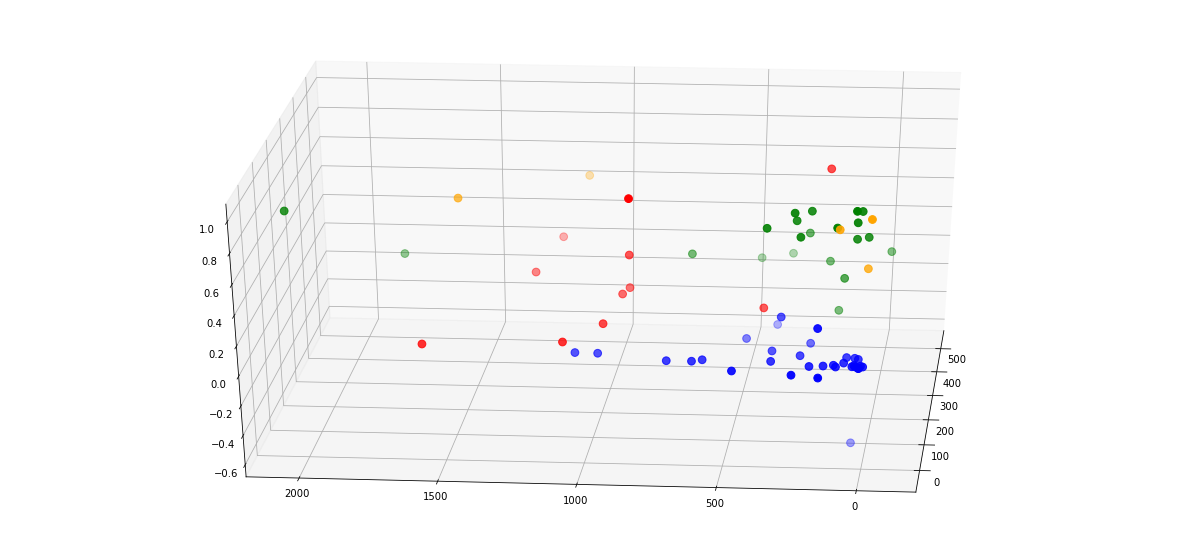

In [741]:
fig = plt.figure(figsize=(21,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["NWP (£m) "][df.cluster == 0], df["Total assets (£m)"][df.cluster == 0], df["Net combined ratio"][df.cluster == 0], c='blue', s=60)
ax.scatter(df["NWP (£m) "][df.cluster == 1], df["Total assets (£m)"][df.cluster == 1], df["Net combined ratio"][df.cluster == 1], c='red', s=60)
ax.scatter(df["NWP (£m) "][df.cluster == 2], df["Total assets (£m)"][df.cluster == 2], df["Net combined ratio"][df.cluster == 2], c='green', s=60)

ax.scatter(df["NWP (£m) "][df.cluster == 3], df["Total assets (£m)"][df.cluster == 3], df["Net combined ratio"][df.cluster == 3], c='orange', s=60)

ax.view_init(30, 185)
plt.show()

<Figure size 1512x1440 with 0 Axes>

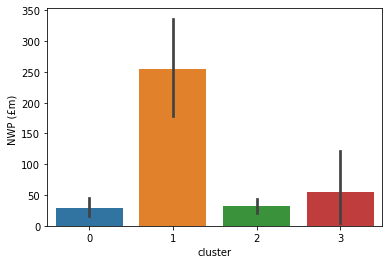

In [742]:
fig = plt.figure(figsize=(21,20))
axes = plt.subplots(1,1)
sns.barplot(x='cluster',y="NWP (£m) ",data=df)

<Figure size 1512x1440 with 0 Axes>

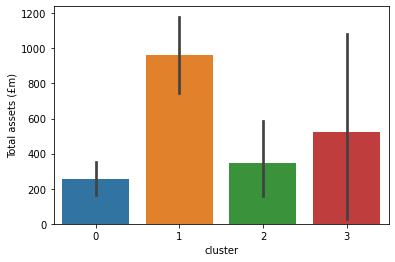

In [743]:
fig = plt.figure(figsize=(21,20))
axes = plt.subplots(1,1)
sns.barplot(x='cluster',y="Total assets (£m)",data=df)

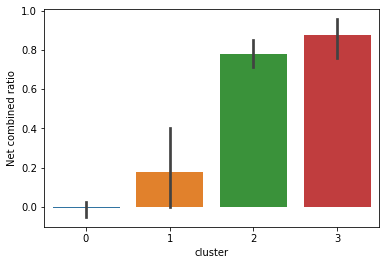

In [744]:
sns.barplot(x='cluster',y="Net combined ratio",data=df)